<a href="https://colab.research.google.com/github/sooyeonahn123/Week1/blob/main/Copy_of_Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os #Used to navigate file structures

In [ ]:
os.path.join('data','periodontal')

'data/periodontal'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
image_exts = ['png']
data_dir = 'Data'

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

# New Section

In [ ]:
import numpy as np

In [ ]:
# data = tf.keras.utils.image_dataset_from_directory('data')

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=10)

Found 97 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next() #Get another batch from iterator

In [ ]:
batch[0].shape

(10, 256, 256, 3)

In [ ]:
#Class 1 (0) = no periodontal
#Class 2 (1) = periodontal
batch[1]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

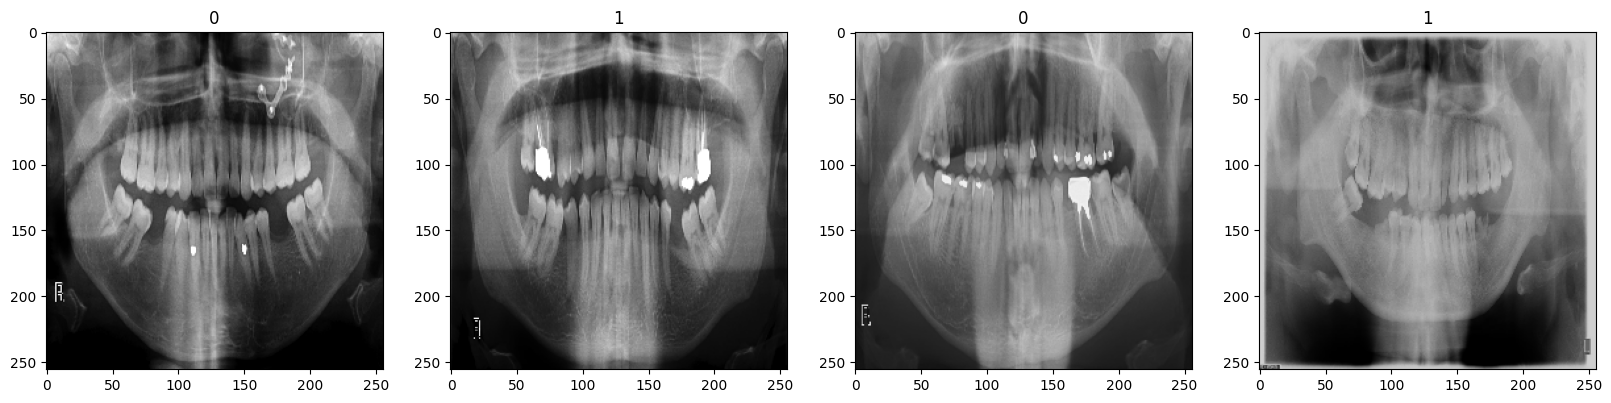

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

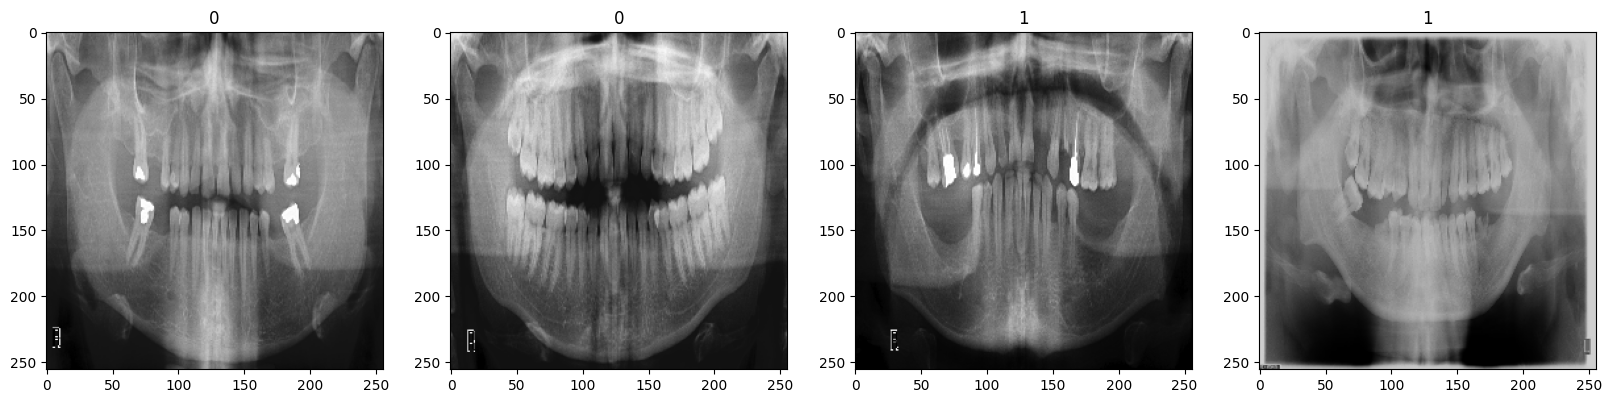

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.60)
val_size = int(len(data)*.20)
test_size = int(len(data)*.20)

if (train_size+val_size+test_size) != len(data):
  print("Sizes do not match")
else:
  print("Sizes match")

Sizes match


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
logdir = "logs\\fit\\"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
def step_decay(epoch):
    initial_lr = 0.0001
    drop_rate = 0.5
    epochs_drop = 20
    new_lr = initial_lr * (drop_rate ** (epoch // epochs_drop))
    return new_lr

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [ ]:
hist = model.fit(train,epochs=100,validation_data = val,callbacks=[tensorboard_callback,early_stopping, lr_scheduler])

Epoch 1/100
6/6 [==============================] - 12s 1s/step - loss: 0.7132 - accuracy: 0.5500 - val_loss: 0.6915 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 2/100
6/6 [==============================] - 5s 533ms/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6552 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 3/100
6/6 [==============================] - 6s 577ms/step - loss: 0.6741 - accuracy: 0.5500 - val_loss: 0.6601 - val_accuracy: 0.6500 - lr: 1.0000e-04
Epoch 4/100
6/6 [==============================] - 5s 526ms/step - loss: 0.6658 - accuracy: 0.5833 - val_loss: 0.7701 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/100
6/6 [==============================] - 6s 744ms/step - loss: 0.6922 - accuracy: 0.5333 - val_loss: 0.6650 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 6/100
6/6 [==============================] - 8s 1s/step - loss: 0.6591 - accuracy: 0.6000 - val_loss: 0.6222 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 7/100
6/6 [==============================] - 5s 523

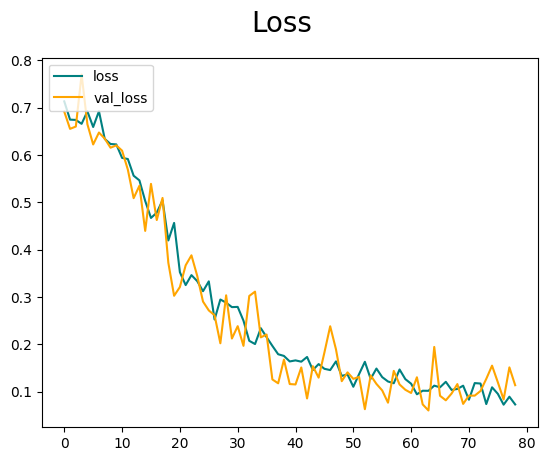

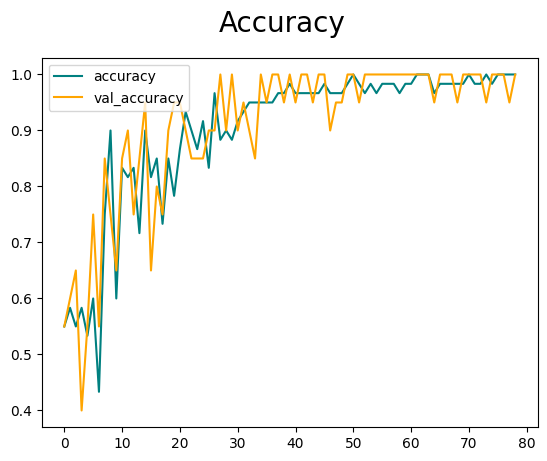

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 176ms/step


In [ ]:
test_labels = y

In [ ]:
test_labels

array([1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
yhat

array([[0.99659437],
       [0.89733493],
       [0.9975635 ],
       [0.59312224],
       [0.8508025 ],
       [0.9451806 ],
       [0.0922461 ]], dtype=float32)

In [ ]:
predicted_labels = np.round(yhat[0:])
predicted_labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [ ]:
import cv2

In [ ]:
img = cv2.imread('test.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
print(yhat[0][0])

In [ ]:
if (yhat[0][0]) > .5:
  print("Periodontal disease is present.")
else:
  print("Periodontal disease is absent.")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

binary_confmat_weights = np.array([[2, -3],
                                  [-6, 2]])

confmat = confusion_matrix(test_labels,predicted_labels )
confmat_score = np.sum(confmat * binary_confmat_weights)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_labels, predicted_labels, pos_label=1)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

In [ ]:
print(f'Confusion Matrix Score: {confmat_score}, ROCAUC: {roc_auc:.3f}')

Confusion Matrix Score: 14, ROCAUC: 1.000


[[1 0]
 [0 6]]

Normalized Confusion Matrix:
[[1. 0.]
 [0. 1.]]


<ipython-input-56-b376d4504ce7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, fontsize=16)
<ipython-input-56-b376d4504ce7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, fontsize=16)


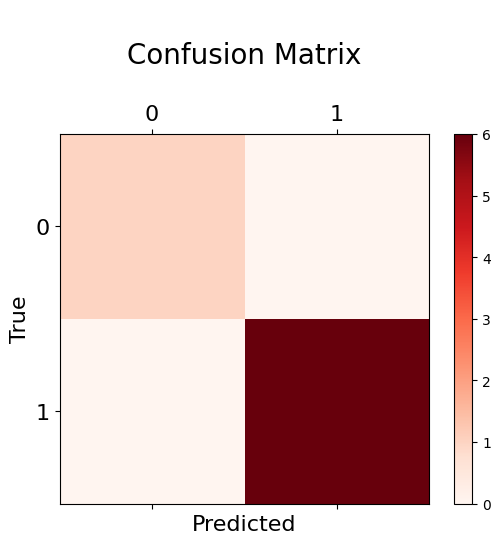

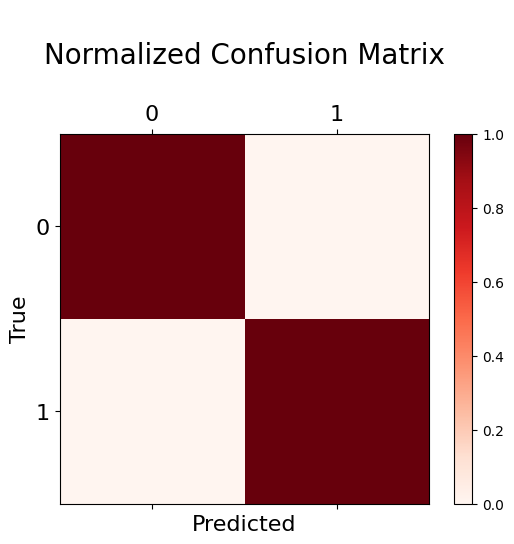

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Confusion Matrix
def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

# Confusion matrix
labels = [0,1]
cm = metrics.confusion_matrix(test_labels, predicted_labels)
print(cm)

# Normalized confusion matrix
print('\nNormalized Confusion Matrix:')
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

plot_cmatrix(cm,labels)
plot_cmatrix(cm_norm,labels,title='Normalized Confusion Matrix')

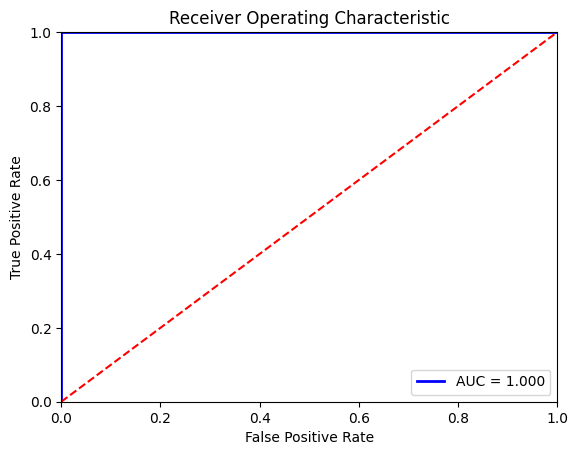

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',linewidth=2, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pickle

filename = 'FPG5(Final).sav'
pickle.dump(hist, open(filename, 'wb'))